# Ecobici: Análisis de edad y tiempo

In [74]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

sns.set_theme(style="whitegrid")

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    upper_bound = Q3 + 1.5 * IQR
    
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    
    return df


def check_column_names(data):
    necessary_columns = [
        'Genero_Usuario',
        'Edad_Usuario',
        'Bici',
        'Ciclo_Estacion_Retiro',
        'Fecha_Retiro',
        'Hora_Retiro',
        'Ciclo_EstacionArribo',
        'Fecha Arribo',
        'Hora_Arribo'
    ]

    if not data.columns.to_list() == necessary_columns:
        raise Exception("El archivo no tiene las columnas necesarias")

## Descarga y preparación de datos

In [71]:
URL = "https://ecobici.cdmx.gob.mx/datos-abiertos/"
page = requests.get(URL)

soup = BeautifulSoup(page.content, "html.parser")

toggle_div = soup.find('div', {'class': 'elementor-toggle'})

links = toggle_div.find_all('a')

In [72]:
URL_TEMPLATE = "https://ecobici.cdmx.gob.mx"
download_links = []
for link in links:
    tmp_link = link['href']
    if '/wp-content/uploads' in tmp_link:
        complete_link = URL_TEMPLATE + tmp_link
        download_links.append(complete_link)

download_links

['https://ecobici.cdmx.gob.mx/wp-content/uploads/2024/02/ecobici_2024_enero.csv',
 'https://ecobici.cdmx.gob.mx/wp-content/uploads/2024/03/2024-02.csv',
 'https://ecobici.cdmx.gob.mx/wp-content/uploads/2024/04/datos_abiertos_2024_03-1.csv',
 'https://ecobici.cdmx.gob.mx/wp-content/uploads/2023/10/ecobici_2023_01.csv',
 'https://ecobici.cdmx.gob.mx/wp-content/uploads/2023/10/ecobici_2023_02.csv',
 'https://ecobici.cdmx.gob.mx/wp-content/uploads/2023/10/ecobici_2023_03.csv',
 'https://ecobici.cdmx.gob.mx/wp-content/uploads/2023/10/ecobici_2023_04.csv',
 'https://ecobici.cdmx.gob.mx/wp-content/uploads/2023/10/ecobici_2023_05.csv',
 'https://ecobici.cdmx.gob.mx/wp-content/uploads/2023/10/ecobici_2023_06.csv',
 'https://ecobici.cdmx.gob.mx/wp-content/uploads/2023/10/ecobici_2023_07.csv',
 'https://ecobici.cdmx.gob.mx/wp-content/uploads/2023/10/ecobici_2023_08.csv',
 'https://ecobici.cdmx.gob.mx/wp-content/uploads/2023/10/ecobici_2023_09.csv',
 'https://ecobici.cdmx.gob.mx/wp-content/uploads

In [75]:
# Se realizará un muestreo al 10%
dfs_list = []

for link in download_links:
    print("Leyendo URL: ", link)
    try:
        tmp_df = pd.read_csv(link).sample(frac=0.1)
        check_column_names(tmp_df)
        dfs_list.append(tmp_df)
    except Exception as err:
        print("Error: ", err)

Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2024/02/ecobici_2024_enero.csv
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2024/03/2024-02.csv
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2024/04/datos_abiertos_2024_03-1.csv
Error:  'utf-8' codec can't decode byte 0xf1 in position 35: invalid continuation byte
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2023/10/ecobici_2023_01.csv
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2023/10/ecobici_2023_02.csv
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2023/10/ecobici_2023_03.csv
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2023/10/ecobici_2023_04.csv
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2023/10/ecobici_2023_05.csv
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2023/10/ecobici_2023_06.csv
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2023/10/ecobici_2023_07.csv
Leyendo URL:  https

/tmp/ipykernel_27631/187427702.py:8: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/07/2022-03.csv


/tmp/ipykernel_27631/187427702.py:8: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/07/2022-04.csv
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/08/2022-05.csv
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/08/2022-06.csv
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/08/2022-07.csv
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2023/10/2022-08.csv


/tmp/ipykernel_27631/187427702.py:8: DtypeWarning:

Columns (3,6) have mixed types. Specify dtype option on import or set low_memory=False.



Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2023/08/202209.csv
Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2023/10/ecobici_2022_10.csv
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2023/10/ecobici_2022_11.csv
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2023/10/ecobici_2022_12.csv
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/07/2021-01.csv
Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/07/2021-02.csv
Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/07/2021-03.csv
Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/07/2021-04.csv
Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/07/

/tmp/ipykernel_27631/187427702.py:8: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/07/2020-04.csv
Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/07/2020-05.csv
Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/07/2020-06.csv
Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/07/2020-07.csv
Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/07/2020-08.csv
Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/07/2020-09.csv
Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/07/2020-10.csv
Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  htt

/tmp/ipykernel_27631/187427702.py:8: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/08/2019-02.csv


/tmp/ipykernel_27631/187427702.py:8: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/08/2019-03.csv


/tmp/ipykernel_27631/187427702.py:8: DtypeWarning:

Columns (2,6,9) have mixed types. Specify dtype option on import or set low_memory=False.



Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/08/2019-04.csv
Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/08/2019-05.csv
Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/08/2019-06.csv
Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/08/2019-07.csv
Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/08/2019-08.csv
Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/08/2019-09.csv
Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/08/2019-10.csv


/tmp/ipykernel_27631/187427702.py:8: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/08/2019-11.csv


/tmp/ipykernel_27631/187427702.py:8: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/08/2019-12.csv


/tmp/ipykernel_27631/187427702.py:8: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/07/2018-01.csv


/tmp/ipykernel_27631/187427702.py:8: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/07/2018-02.csv


/tmp/ipykernel_27631/187427702.py:8: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/07/2018-03.csv


/tmp/ipykernel_27631/187427702.py:8: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/07/2018-04.csv


/tmp/ipykernel_27631/187427702.py:8: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/07/2018-05.csv
Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/07/2018-06.csv
Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/07/2018-07.csv
Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/07/2018-08.csv
Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/07/2018-09.csv
Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/07/2018-10.csv
Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/07/2018-11.csv


/tmp/ipykernel_27631/187427702.py:8: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/07/2018-12.csv
Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/08/2017-01.csv
Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/08/2017-02.csv
Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/08/2017-03.csv
Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/08/2017-04.csv
Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/08/2017-05.csv


/tmp/ipykernel_27631/187427702.py:8: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/08/2017-06.csv
Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/09/2017-07.csv


/tmp/ipykernel_27631/187427702.py:8: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/08/2017-08.csv


/tmp/ipykernel_27631/187427702.py:8: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/08/2017-09.csv


/tmp/ipykernel_27631/187427702.py:8: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/08/2017-10.csv


/tmp/ipykernel_27631/187427702.py:8: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/08/2017-11.csv


/tmp/ipykernel_27631/187427702.py:8: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/08/2017-12.csv


/tmp/ipykernel_27631/187427702.py:8: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/08/2016-01.csv


/tmp/ipykernel_27631/187427702.py:8: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/08/2016-02.csv


/tmp/ipykernel_27631/187427702.py:8: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/08/2016-03.csv


/tmp/ipykernel_27631/187427702.py:8: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/08/2016-04.csv


/tmp/ipykernel_27631/187427702.py:8: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/08/2016-05.csv


/tmp/ipykernel_27631/187427702.py:8: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/08/2016-06.csv


/tmp/ipykernel_27631/187427702.py:8: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/08/2016-07.csv
Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/08/2016-08.csv


/tmp/ipykernel_27631/187427702.py:8: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/08/2016-09.csv
Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/08/2016-10.csv


/tmp/ipykernel_27631/187427702.py:8: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/08/2016-11.csv


/tmp/ipykernel_27631/187427702.py:8: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/08/2016-12.csv
Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/07/2015-01.csv
Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/07/2015-02.csv


/tmp/ipykernel_27631/187427702.py:8: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/07/2015-03.csv


/tmp/ipykernel_27631/187427702.py:8: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/07/2015-04.csv
Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/07/2015-05.csv
Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/07/2015-06.csv


/tmp/ipykernel_27631/187427702.py:8: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/07/2015-07.csv


/tmp/ipykernel_27631/187427702.py:8: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/07/2015-08.csv


/tmp/ipykernel_27631/187427702.py:8: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/07/2015-09.csv


/tmp/ipykernel_27631/187427702.py:8: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/07/2015-10.csv


/tmp/ipykernel_27631/187427702.py:8: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/09/2015-11.csv


/tmp/ipykernel_27631/187427702.py:8: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/07/2015-12.csv


/tmp/ipykernel_27631/187427702.py:8: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/08/2014-01.csv
Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/08/2014-02.csv
Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/08/2014-03.csv
Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/08/2014-04.csv
Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/08/2014-05.csv
Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/08/2014-06.csv
Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/09/2014-07.csv
Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  htt

/tmp/ipykernel_27631/187427702.py:8: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/08/2014-11.csv
Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/08/2014-12.csv
Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/07/2013-01.csv
Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/07/2013-02.csv
Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/07/2013-03.csv
Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/07/2013-04.csv
Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/07/2013-05.csv
Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  htt

/tmp/ipykernel_27631/187427702.py:8: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/07/2011-05.csv
Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/07/2011-06.csv
Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/07/2011-07.csv
Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/07/2011-08.csv
Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/07/2011-09.csv
Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/07/2011-10.csv
Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/07/2011-11.csv
Error:  El archivo no tiene las columnas necesarias
Leyendo URL:  htt

In [76]:
df = pd.concat(dfs_list)
df.shape

(2263197, 9)

In [77]:
df.head()

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha Arribo,Hora_Arribo
276860,M,41.0,2980837,095,08/01/2024,16:32:23,043,08/01/2024,16:47:24
424698,F,48.0,6944581,294,11/01/2024,08:51:00,301,11/01/2024,09:00:29
1181678,M,55.0,8498446,146,25/01/2024,10:12:19,068,25/01/2024,10:16:25
931506,M,18.0,7480627,071,20/01/2024,16:19:17,180,20/01/2024,16:23:48
1157149,O,26.0,3875895,323,24/01/2024,19:49:27,604,24/01/2024,19:59:40


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2263197 entries, 276860 to 70474
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Genero_Usuario         object 
 1   Edad_Usuario           float64
 2   Bici                   object 
 3   Ciclo_Estacion_Retiro  object 
 4   Fecha_Retiro           object 
 5   Hora_Retiro            object 
 6   Ciclo_EstacionArribo   object 
 7   Fecha Arribo           object 
 8   Hora_Arribo            object 
dtypes: float64(1), object(8)
memory usage: 172.7+ MB


## Limpieza y transformación de datos

### Rango de Edades

In [80]:
df["Edad_Usuario"] = pd.to_numeric(df["Edad_Usuario"], errors='coerce').fillna(0).astype(int)

In [81]:
# Definir los rangos de edades
bins = [0, 18, 40, 65, float('inf')] 
labels = ['0 a 18', '19 a 40', '41 a 65 ', 'mayor a 65']

# Crear una nueva columna 'rango_edad' con los rangos de edades
df["rango_edad"] = pd.cut(df['Edad_Usuario'], bins=bins, labels=labels, right=False)
df["rango_edad"] = df["rango_edad"].astype(str)

In [106]:
df["Edad_Usuario"].describe()

count   1970851.0
mean         34.6
std          10.0
min           0.0
25%          28.0
50%          32.0
75%          40.0
max         122.0
Name: Edad_Usuario, dtype: float64

### Tiempo que los usuarios usan las Ecobici

In [85]:
def check_time_format(time_str, format='%d/%m/%Y %H:%M:%S'):
    try:
        datetime.strptime(str(time_str), format)
        return True
    except ValueError:
        return False
    

df["correct_format_retiro"] = df["str_datetime_retiro"].apply(lambda row: check_time_format(row))
df["correct_format_arribo"] = df["str_datetime_arribo"].apply(lambda row: check_time_format(row))

In [86]:
df.groupby("correct_format_retiro")["correct_format_retiro"].count()

correct_format_retiro
False     292346
True     1970851
Name: correct_format_retiro, dtype: int64

In [87]:
df.groupby("correct_format_retiro")["correct_format_arribo"].count()

correct_format_retiro
False     292346
True     1970851
Name: correct_format_arribo, dtype: int64

In [89]:
# Quitando fechas incorrectas
df = df[df["correct_format_retiro"] & df["correct_format_retiro"]]

In [97]:
df["str_datetime_retiro"] = df["Fecha_Retiro"] + " " + df["Hora_Retiro"]
df["str_datetime_arribo"] = df["Fecha Arribo"] + " " + df["Hora_Arribo"]

df["datetime_retiro"] = df["str_datetime_retiro"].apply(lambda row: datetime.strptime(row, "%d/%m/%Y %H:%M:%S"))
df["datetime_arribo"] = df["str_datetime_arribo"].apply(lambda row: datetime.strptime(row, "%d/%m/%Y %H:%M:%S"))

def get_usage_time(row):
    """"""
    return (row["datetime_arribo"] - row["datetime_retiro"]).total_seconds() / 60

df["tiempo_minutos"] = df.apply(lambda row: get_usage_time(row), axis=1)

In [99]:
pd.options.display.float_format = '{:.1f}'.format

In [100]:
df["tiempo_minutos"].describe()

count   1970851.0
mean         80.9
std        2308.9
min         -58.9
25%           7.4
50%          12.3
75%          20.4
max      160026.9
Name: tiempo_minutos, dtype: float64

#### Análisis de datos y visualización

In [101]:
df.columns

Index(['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro',
       'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_EstacionArribo', 'Fecha Arribo',
       'Hora_Arribo', 'rango_edad', 'str_datetime_retiro',
       'str_datetime_arribo', 'correct_format_retiro', 'correct_format_arribo',
       'datetime_retiro', 'datetime_arribo', 'tiempo_minutos'],
      dtype='object')

In [107]:
continuous_variables = [
    "tiempo_minutos",
    # NOTE: Aunque la edad del usuario no es una variable continua,
    # considero que el histograma ayuda a explorar esta variable de una 
    # manera visual
    "Edad_Usuario"
]

discrete_variables = [
    "Genero_Usuario",
    "rango_edad"
]

In [108]:
# Tratamiento de outliers para mejorar la visualización
df = remove_outliers_iqr(df, 'tiempo_minutos')

array([[<Axes: title={'center': 'tiempo_minutos'}>,
        <Axes: title={'center': 'Edad_Usuario'}>]], dtype=object)

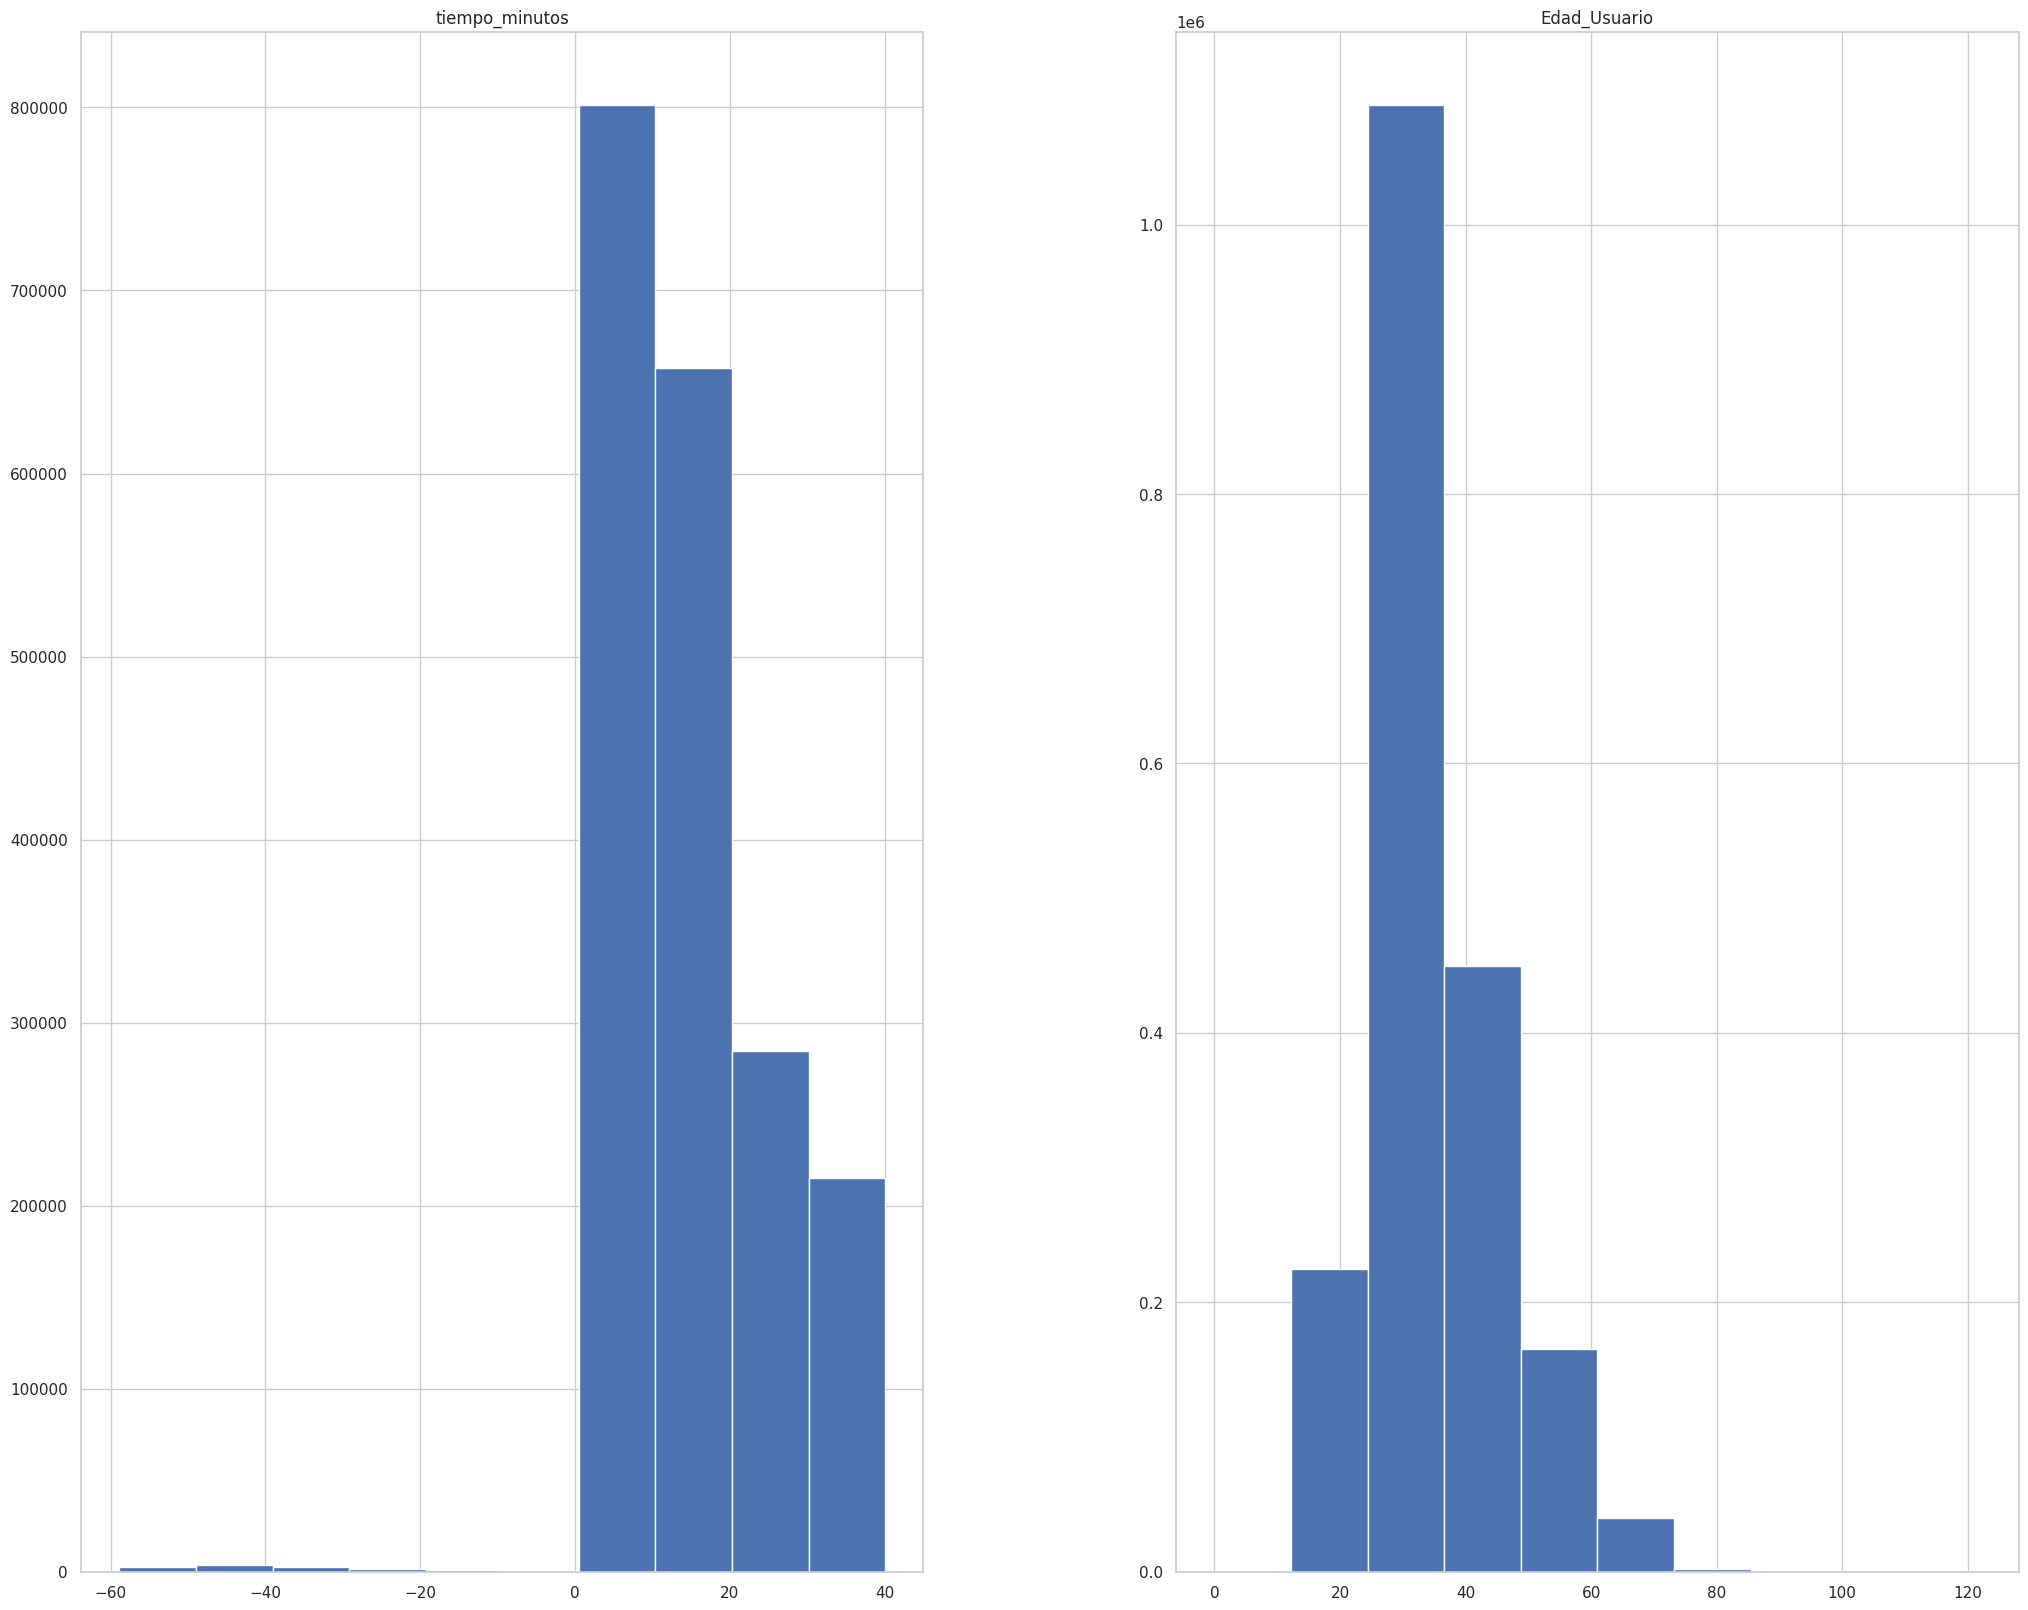

In [109]:
hist(df, continuous_variables)

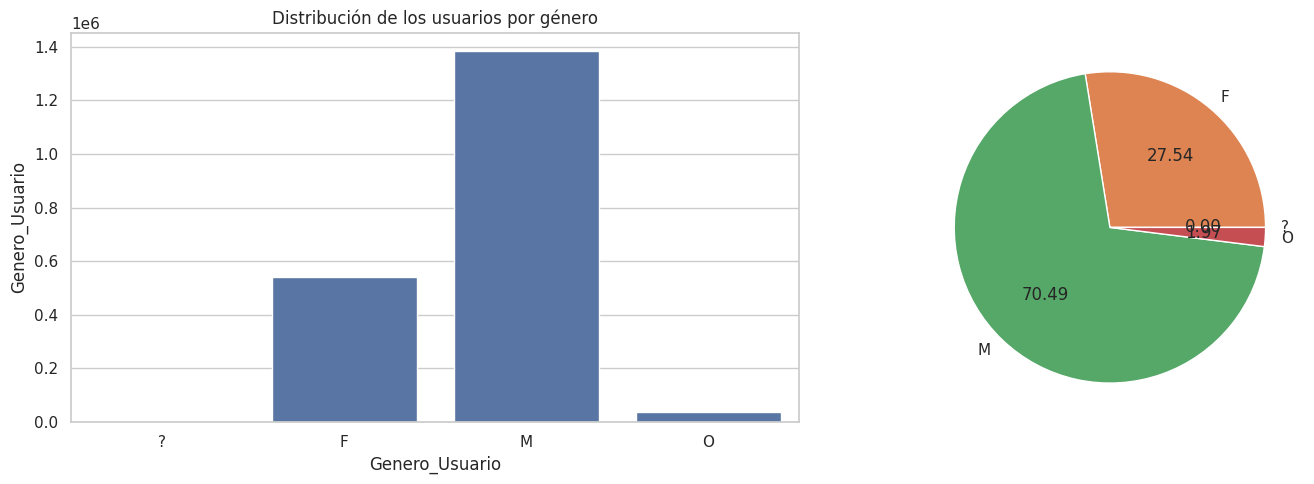

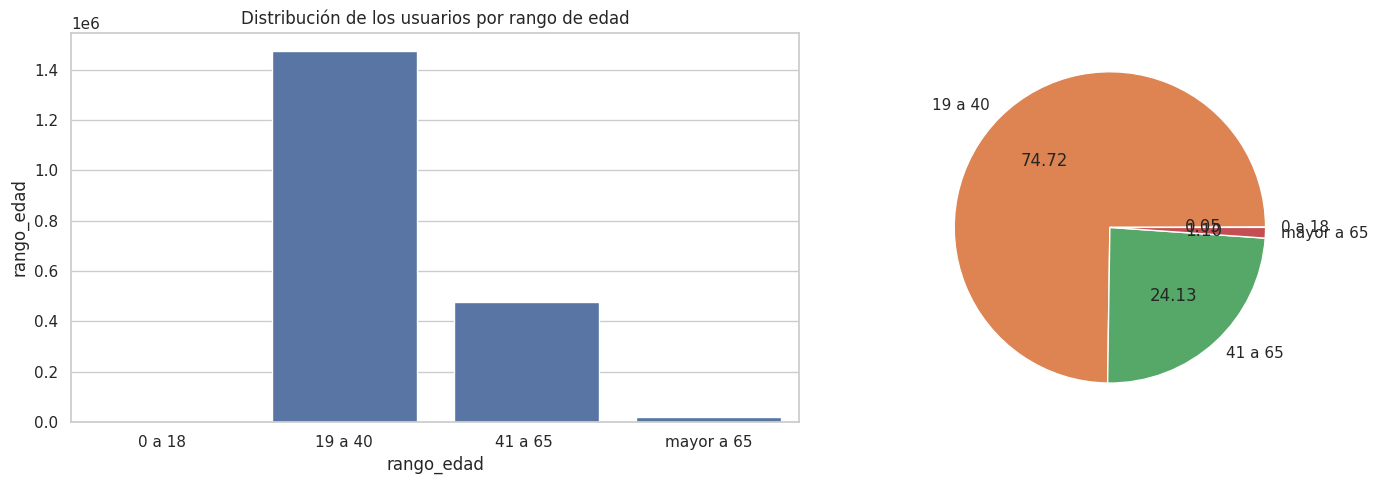

In [110]:
discrete_dict = {
    "Genero_Usuario": "Distribución de los usuarios por género",
    "rango_edad": "Distribución de los usuarios por rango de edad",
}

for n, (column, title) in enumerate(discrete_dict.items(), 1):
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    sns.barplot(df.groupby(column)[column].count(), ax=axs[0]).set_title(title)
    df.groupby(column).size().plot(kind='pie', autopct='%.2f',  ax=axs[1])
    plt.tight_layout()
    plt.show()

La edad promedio de los usuarios es de 34.6 años, por lo que, por lo que es popular entre adultos jóvenes o de mediana edad. Con una desviación estándar de 10 años, los datos se encuentran relativamente concentrados. Aunque el rango de edad abarco de 0 a 18 años, no hay ususarios con estas edad, puede que se deba a que es un requisito ser mayor de edad. 

La mayoría de los usarios (75%) tienen menos de 40 años. 

La duración promedio de los viajes es de 81 minutos. La mayoría de viajes dura 20 min (75% de los viajes), por lo que podemos decir que el servicio es popular para viajes de corta o mediana duración. 

Con una desviación estándar de 2,308 minutos, hay una gran variabilidad en la duración de los viajes, que sería interesante analizar con cuestiones de tráfico, distancia recorrida o el tiempo que el usuario mantiene una bici bajo su cargo. 

Con datos negativos en el timpo de recorridos, habría que revisar la calidad de la información. Incluso fue necesario quitar algunos registros con error en el formato de fecha o tratarlo de otra manera, como una imputación de datos, para conservar los registros, principalmente los de edad.

En siguientes iteraciones se deberían analizar a profundidad los archivos, para corroborar los nombres de las columnas y si todos los años contienen las mismas variables.


